In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import sklearn.model_selection as ms

import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [149]:
#import datasets

train = pd.read_csv("dataX.csv")

In [150]:
#train = train1.merge(train2,how="left",on='row_id')
train.head()

,bedrooms,bathrooms,toilets,description,location,spec_location,price
0,4,4,5,4 Bedroom terrace duplex for Lease. 3 years re...,ikeja,off isaac john street ikeja gra ikeja lagos,5000000
1,3,3,4,This property is located within the heart of o...,ikeja,bamishele estate off allen opebi ikeja lagos,4000000
2,3,3,4,3 bedroom Shared Apartment Flat / Apartment fo...,ikeja,off allen avenue allen avenue ikeja lagos,4000000
3,5,6,6,A newly renovated 5bedroomfully detached duple...,ikeja,"off ogunlani estate, allen, ikeja. allen avenu...",2800000
4,1,1,1,clean pop all round tiles big compound ... Old...,ikeja,ikeja gra ikeja lagos,1000000


In [151]:
train.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'description', 'location',
       'spec_location', 'price'],
      dtype='object')

In [152]:
#Change coluumns names
# train.columns = ['spec_location','bedrooms','bathrooms','toilets','description','price','location']

In [153]:
#Subset the data to capture only relevant columns
train = train[['bedrooms','bathrooms','toilets','description',
               'location','spec_location','price']]

In [154]:
#Inspect dataframe
train.head()

,bedrooms,bathrooms,toilets,description,location,spec_location,price
0,4,4,5,4 Bedroom terrace duplex for Lease. 3 years re...,ikeja,off isaac john street ikeja gra ikeja lagos,5000000
1,3,3,4,This property is located within the heart of o...,ikeja,bamishele estate off allen opebi ikeja lagos,4000000
2,3,3,4,3 bedroom Shared Apartment Flat / Apartment fo...,ikeja,off allen avenue allen avenue ikeja lagos,4000000
3,5,6,6,A newly renovated 5bedroomfully detached duple...,ikeja,"off ogunlani estate, allen, ikeja. allen avenu...",2800000
4,1,1,1,clean pop all round tiles big compound ... Old...,ikeja,ikeja gra ikeja lagos,1000000


In [155]:
#check for null values
train.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
description      0
location         0
spec_location    0
price            0
dtype: int64

In [156]:
train.dtypes

bedrooms          int64
bathrooms         int64
toilets           int64
description      object
location         object
spec_location    object
price             int64
dtype: object

In [157]:
# convert price and features to numeric from string
train2 = train.copy()
train2['price'] = pd.to_numeric(train2['price'], errors='coerce')
train2['bedrooms'] = pd.to_numeric(train2['bedrooms'], errors='coerce')
train2['bathrooms'] = pd.to_numeric(train2['bathrooms'], errors='coerce')
train2['toilets'] = pd.to_numeric(train2['toilets'], errors='coerce')

In [158]:
#Fill NAs after conversion
train2['price']=train2['price'].fillna(0)
train2['bedrooms']=train2['bedrooms'].fillna(0)
train2['bathrooms']=train2['bathrooms'].fillna(0)
train2['toilets']=train2['toilets'].fillna(0)

In [159]:
train.shape

(3269, 7)

In [160]:
#Subset data to ensure only data with price >0 is used
train2 = train2[train2['price']!=0]
train2 = train2[(train2['bedrooms']!=0) | (train2['bathrooms'] !=0) | (train2['toilets']!=0)]

In [161]:
#Inspect new shape
train2.shape

(3269, 7)

In [162]:
#create new features
train2['estate_flag'] = train2['description'].apply(lambda x: len([c for c in str(x).lower().split() if "estate" in c]))

train2['terrace_flag'] = train2['description'].apply(lambda x: len([c for c in str(x).lower().split() if "terraced" 
                                                                  in c or "terrace" in c or "detached" in c
                                                                 or "duplex" in c]))

train2['new_flag'] = train2['description'].apply(lambda x: len([c for c in str(x).lower().split()
                                                              if "new" in c or "luxur" in c 
                                                              or "executive" in c]))

train2['serviced_flag'] = train2['description'].apply(lambda x: len([c for c in str(x).lower().split() if "service" in c]))

train2['security_flag'] = train2['description'].apply(lambda x: len([c for c in str(x).lower().split() if "security" in c]))

In [163]:
# Convert new features to 1 and 0 by allocating values greater than 1 to 1
# The features were created by using a count(len) this means some rows may have a value greater than 1
train2['estate_flag'][train2['estate_flag'] >= 1] = 1
train2['terrace_flag'][train2['terrace_flag'] >= 1] = 1
train2['serviced_flag'][train2['serviced_flag'] >= 1] = 1
train2['new_flag'][train2['new_flag'] >= 1] = 1
train2['security_flag'][train2['security_flag'] >= 1] = 1

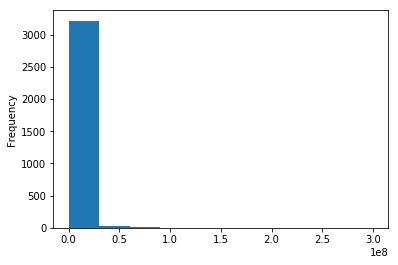

In [164]:
#Examine distribution of all houses to identify outliers
train2['price'].plot("hist")

In [165]:
#Define a threshold based on percentile to avoid hardcoding
threshold = np.percentile(train2['price'],90)
threshold

5000000.0

In [166]:
# Inspect prices greater than the threshold
train2[train2['price'] <= threshold].sort_values('price', ascending=False).head(70)

,bedrooms,bathrooms,toilets,description,location,spec_location,price,estate_flag,terrace_flag,new_flag,serviced_flag,security_flag
0,4,4,5,4 Bedroom terrace duplex for Lease. 3 years re...,ikeja,off isaac john street ikeja gra ikeja lagos,5000000,0,1,1,1,1
1777,5,5,6,Serviced 5 bedroom duplex (terrace) ... New. S...,lekki,off freedom way lekki phase 1 lekki phase 1 le...,5000000,0,1,1,1,1
128,5,5,6,A Bar and 4 Bedroom Duplex For Rent at Adeniyi...,ikeja,adeniyi jones ikeja lagos,5000000,0,1,0,0,0
1835,4,4,5,Newly built luxurious serviced 4bedroom bungal...,lekki,lekki paradise chevron lekki lagos,5000000,1,0,1,1,1
1868,4,4,5,4 BEDROOM DETACHED DUPLEX FOR RENT! Location: ...,lekki,orchid road oral estate lekki lagos,5000000,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3203,5,6,6,It's a spacious and secured duplex in a lovely...,lekki,6th avenue eletu osapa london osapa london lek...,5000000,1,1,1,0,0
2640,4,4,5,Lovely 4 bedroom semi-detached duplex ... ...,lekki,osapa london lekki lagos,5000000,0,1,0,0,0
54,4,4,5,To Let: A 4 Bedroom Terrace duplex with a Room...,ikeja,showemimo str ikeja gra ikeja gra ikeja lagos,5000000,0,1,1,0,1
2636,4,4,5,The property is a newly built 4 bedroom detach...,lekki,lekki paradise estate chevron lekki lagos,5000000,1,1,1,1,1


In [167]:
#Notice that some of the houses are actually for sale 
#and not rent hence the reason for the high price

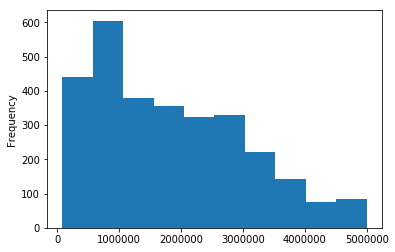

In [168]:
# Examine distribution of all houses to identify outliers
train2['price'][train2['price'] <= threshold].plot("hist")

In [169]:
# Subset to eliminate outliers
train2 = train2[train2['price'] <= threshold]

In [170]:
#check shape
train2.shape

(2955, 12)

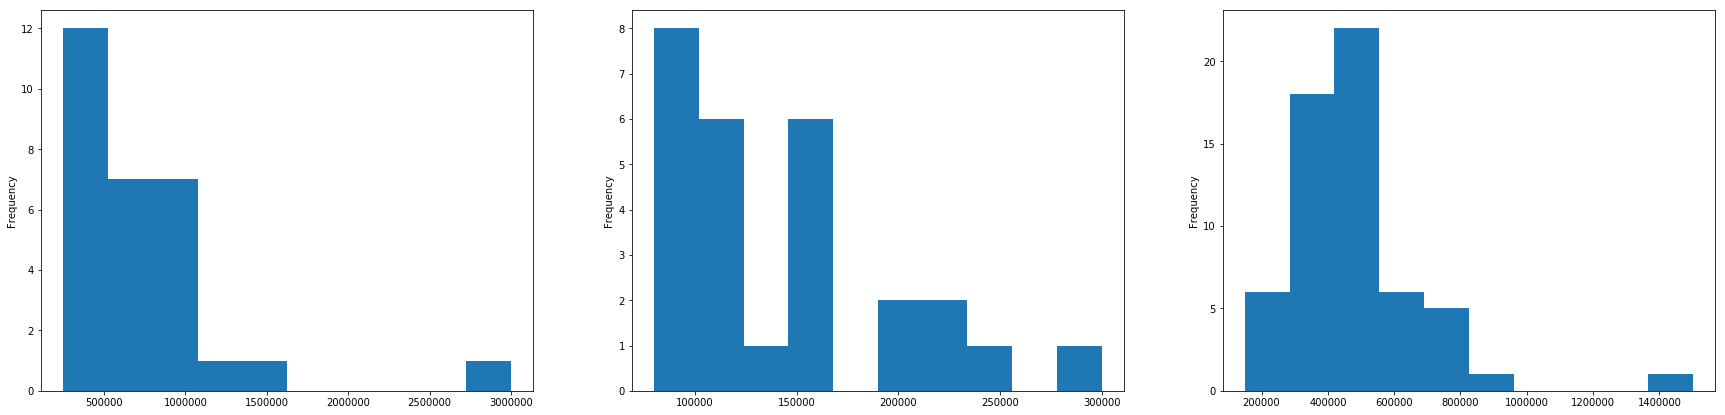

In [171]:
#Inspect the distribution of houses per location and size of house
locations = list(train2['location'].unique())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 3, 1)
train2['price'][(train2['location']==locations[0])&(train2['bedrooms']==1)].plot("hist")
fig.add_subplot(1, 3, 2)
train2['price'][(train2['location']==locations[1])&(train2['bedrooms']==1)].plot("hist")
fig.add_subplot(1, 3, 3)
train2['price'][(train2['location']==locations[2])&(train2['bedrooms']==1)].plot("hist")

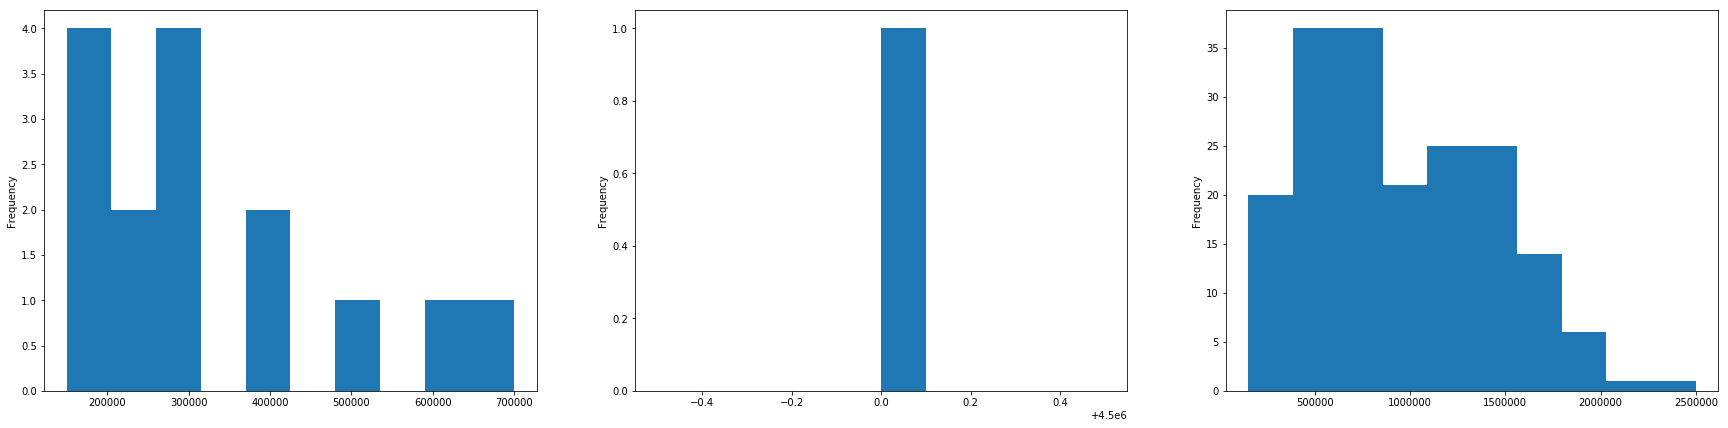

In [172]:
#Inspect the distribution of houses per location and size of house
locations = list(train2['location'].unique())

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 3, 1)
train2['price'][(train2['location']==locations[6])&(train2['bedrooms']==1)].plot("hist")
fig.add_subplot(1, 3, 2)
train2['price'][(train2['location']==locations[7])&(train2['bedrooms']==3)].plot("hist")
fig.add_subplot(1, 3, 3)
train2['price'][(train2['location']==locations[8])&(train2['bedrooms']==1)].plot("hist")

In [173]:
#Since some houses may have missing info it means some estate/serviced houses are not called estate/serviced houses. 
#Assumptions are made around houses which are not identified as estate/ service houses. 
#The median/50th percentile of those houses is identified and any house above the median is considered as estate.
#Houses higher than 80th percentile are classified as serviced


estate_price = []
import numpy as np
for location in locations:
    for i in range(1,10):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['serviced_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['serviced_price'] = 0
            d['estate_price'] = 0
        estate_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in ikeja :  575000.0
This is the median for 2 bedroom in ikeja :  1300000.0
This is the median for 3 bedroom in ikeja :  2400000.0
This is the median for 4 bedroom in ikeja :  3500000.0
This is the median for 5 bedroom in ikeja :  4000000.0
This is the median for 6 bedroom in ikeja :  0
This is the median for 7 bedroom in ikeja :  0
This is the median for 8 bedroom in ikeja :  0
This is the median for 9 bedroom in ikeja :  0
This is the median for 1 bedroom in ikorodu :  120000.0
This is the median for 2 bedroom in ikorodu :  250000.0
This is the median for 3 bedroom in ikorodu :  400000.0
This is the median for 4 bedroom in ikorodu :  600000.0
This is the median for 5 bedroom in ikorodu :  0
This is the median for 6 bedroom in ikorodu :  0
This is the median for 7 bedroom in ikorodu :  0
This is the median for 8 bedroom in ikorodu :  0
This is the median for 9 bedroom in ikorodu :  3000000.0
This is the median for 1 bedroom in surulere :  450000.0
This

In [174]:
#save the output in a dataframe and in order to merge with original dataframe
estate_price=pd.DataFrame(estate_price)
estate_price['locationbed'] = estate_price['location'] + estate_price['bedspace'].astype(str)
estate_price = estate_price.drop(["location","bedspace"],axis=1)

In [175]:
estate_price.head()

,estate_price,serviced_price,locationbed
0,575000.0,1000000.0,ikeja1
1,1300000.0,2600000.0,ikeja2
2,2400000.0,3500000.0,ikeja3
3,3500000.0,5000000.0,ikeja4
4,4000000.0,4400000.0,ikeja5


In [176]:
#merge to original dataframe to create new dataframe
train2['locationbed']  = train2 ['location'] + train2 ['bedrooms'].astype(str)
train3 = pd.merge(train2,estate_price, on ="locationbed", how = "left")

In [177]:
#identify estate houses that were not called estate houses by assigning houses greater than median as estate houses
#identify serviced houses that were not called serviced houses by assigning houses greater than 80th percentile as serviced houses
#terrace houses are typically greater than 1.8m based on distribution
train3['estate_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==6)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==7)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==8)&(train3['price'] > train3['estate_price'])] = 1
train3['estate_flag'][(train3['bedrooms']==9)&(train3['price'] > train3['estate_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==6)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==7)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==8)&(train3['price'] > train3['serviced_price'])] = 1
train3['serviced_flag'][(train3['bedrooms']==9)&(train3['price'] > train3['serviced_price'])] = 1

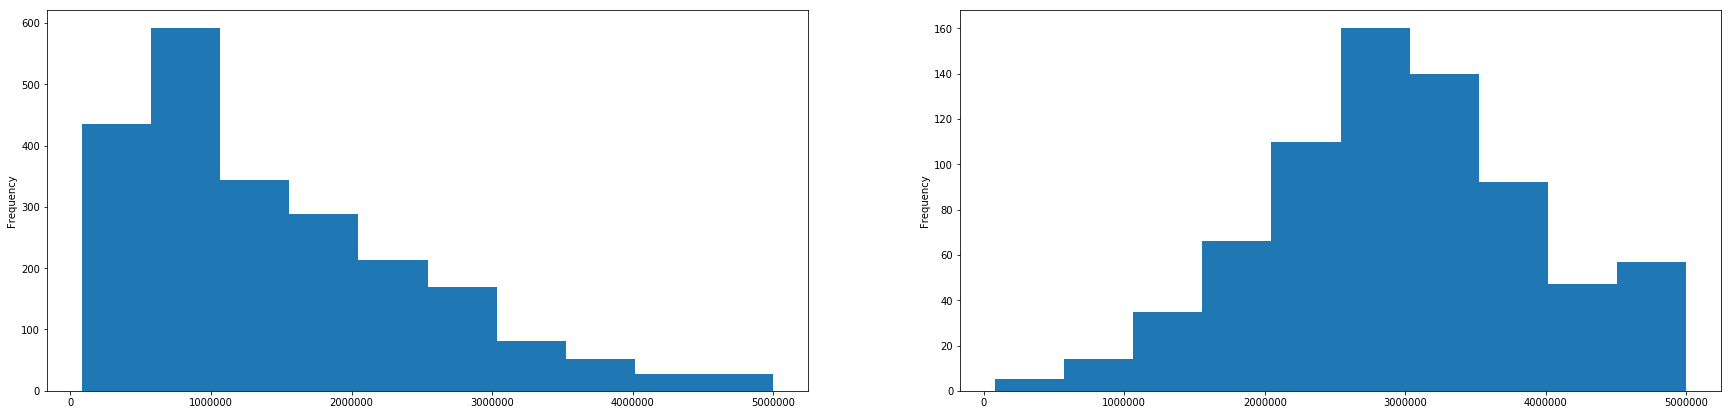

In [178]:
#inspect houses that are terrace/duplex/detached to see if they are typically higher 
fig = plt.figure(figsize=(30,7))
fig.add_subplot(1, 2, 1)
train3['price'][train3['terrace_flag']==0].plot("hist")
fig.add_subplot(1, 2, 2)
train3['price'][train3['terrace_flag']==1].plot("hist")

In [179]:
#check to find out if Terrace/duplex/detached houses are higher than normal houses on average
for location in locations:
    for i in range(2,10):
        
        try:
            print("This is the median for a normal {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['terrace_flag']==0)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for a normal {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)
        try:
            print("This is the median for a terraced {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['terrace_flag']==1)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for a terraced {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for a normal 2 bedroom in ikeja :  1300000.0
This is the median for a terraced 2 bedroom in ikeja :  1100000.0
This is the median for a normal 3 bedroom in ikeja :  2000000.0
This is the median for a terraced 3 bedroom in ikeja :  3350000.0
This is the median for a normal 4 bedroom in ikeja :  3250000.0
This is the median for a terraced 4 bedroom in ikeja :  3500000.0
This is the median for a normal 5 bedroom in ikeja :  4000000.0
This is the median for a terraced 5 bedroom in ikeja :  3750000.0
This is the median for a normal 6 bedroom in ikeja :  0
This is the median for a terraced 6 bedroom in ikeja :  0
This is the median for a normal 7 bedroom in ikeja :  0
This is the median for a terraced 7 bedroom in ikeja :  0
This is the median for a normal 8 bedroom in ikeja :  0
This is the median for a terraced 8 bedroom in ikeja :  5000000.0
This is the median for a normal 9 bedroom in ikeja :  0
This is the median for a terraced 9 bedroom in ikeja :  0
This is the medi

In [180]:
#The above shows that they are.
#Since some houses may have missing info it means some terrace houses are not called terrace houses. 
#Assumptions are made around houses which are not identified as terrace houses. 
#The median/50th percentile of houses which are terrace is identified and any house = or above the median is considered terrace.

terrace_price = []
import numpy as np
for location in locations:
    for i in range(2,10):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['terrace_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['terrace_flag']==1)],50)    
        except (IndexError,TypeError) as e:
            d['terrace_price'] = 0
        terrace_price.append(d)
        try:
            print("This is the median for a terrace {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['terrace_flag']==1)],50))
        except (IndexError,TypeError) as e:
            print("This is the median for a terrace {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for a terrace 2 bedroom in ikeja :  1100000.0
This is the median for a terrace 3 bedroom in ikeja :  3350000.0
This is the median for a terrace 4 bedroom in ikeja :  3500000.0
This is the median for a terrace 5 bedroom in ikeja :  3750000.0
This is the median for a terrace 6 bedroom in ikeja :  0
This is the median for a terrace 7 bedroom in ikeja :  0
This is the median for a terrace 8 bedroom in ikeja :  5000000.0
This is the median for a terrace 9 bedroom in ikeja :  0
This is the median for a terrace 2 bedroom in ikorodu :  435000.0
This is the median for a terrace 3 bedroom in ikorodu :  500000.0
This is the median for a terrace 4 bedroom in ikorodu :  600000.0
This is the median for a terrace 5 bedroom in ikorodu :  0
This is the median for a terrace 6 bedroom in ikorodu :  0
This is the median for a terrace 7 bedroom in ikorodu :  0
This is the median for a terrace 8 bedroom in ikorodu :  0
This is the median for a terrace 9 bedroom in ikorodu :  0
This is the

In [181]:
#save the output in a dataframe and in order to merge with original dataframe
terrace_price=pd.DataFrame(terrace_price)
terrace_price['locationbed'] = terrace_price['location'] + terrace_price['bedspace'].astype(str)
terrace_price = terrace_price.drop(["location","bedspace"],axis=1)
terrace_price.head()

,terrace_price,locationbed
0,1100000.0,ikeja2
1,3350000.0,ikeja3
2,3500000.0,ikeja4
3,3750000.0,ikeja5
4,0.0,ikeja6


In [182]:
#merge to original dataframe to create new dataframe
train3 = pd.merge(train3,terrace_price, on ="locationbed", how = "left")

In [183]:
#identify terrace houses that were not called terrace houses by assigning houses greater than median as terrace houses
#Terrace housese are typically from 2 bedroom
train3['terrace_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==6)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==7)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==8)&(train3['price'] > train3['terrace_price'])] = 1
train3['terrace_flag'][(train3['bedrooms']==9)&(train3['price'] > train3['terrace_price'])] = 1

In [184]:
#Location is not giving the best results as a feature, however merging location and number of beds and ranking that 
#gives your model a better and stronger feature because the lower the rank, the lower the price.
g = train3.groupby(['location','bedrooms'])['price'].median().reset_index().sort_values('price')
g['location_rank']= g['price'].rank()#np.linspace(1,14,14)
g['location_rank'] = g['location_rank'].astype(int)
g['locationbed'] = g['location'] + g ['bedrooms'].astype(str)
g = g.drop(["price","location","bedrooms"],axis=1)
g
#.columns

# g.to_csv('locationrank.csv', index=False)

,location_rank,locationbed
18,1,ikorodu1
19,2,ikorodu2
31,3,ogba1
20,4,ikorodu3
0,6,ajah1
41,6,yaba1
7,6,gbagada1
35,6,surulere1
21,9,ikorodu4
12,10,ikeja1


In [185]:
#merge to dataframe
train3 = pd.merge(train3,g, on ="locationbed", how = "left")

In [186]:
train3.shape

(2955, 17)

In [187]:
train3.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'description', 'location',
       'spec_location', 'price', 'estate_flag', 'terrace_flag', 'new_flag',
       'serviced_flag', 'security_flag', 'locationbed', 'estate_price',
       'serviced_price', 'terrace_price', 'location_rank'],
      dtype='object')

In [188]:
#make similar assumptions for new/luxurious/executive houses which were not classified as that
new_price = []
import numpy as np
for location in locations:
    for i in range(1,10):
        d = {}
        d['location'] = location
        d['bedspace'] = i
        try:
            d['estate_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],50)
            d['new_price'] = np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80)
        except (IndexError,TypeError) as e:
            d['new_price'] = 0
            d['estate_price'] = 0
        new_price.append(d)
        try:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,np.percentile(train2['price'][(train2['location']==location)&(train2['bedrooms']==i)&(train2['estate_flag']==0)],80))
        except (IndexError,TypeError) as e:
            print("This is the median for {bed} bedroom in {location} : ".format(bed = i,location = location) ,0)

This is the median for 1 bedroom in ikeja :  1000000.0
This is the median for 2 bedroom in ikeja :  2600000.0000000014
This is the median for 3 bedroom in ikeja :  3500000.0
This is the median for 4 bedroom in ikeja :  5000000.0
This is the median for 5 bedroom in ikeja :  4400000.0
This is the median for 6 bedroom in ikeja :  0
This is the median for 7 bedroom in ikeja :  0
This is the median for 8 bedroom in ikeja :  0
This is the median for 9 bedroom in ikeja :  0
This is the median for 1 bedroom in ikorodu :  200000.0
This is the median for 2 bedroom in ikorodu :  440000.0
This is the median for 3 bedroom in ikorodu :  600000.0
This is the median for 4 bedroom in ikorodu :  600000.0
This is the median for 5 bedroom in ikorodu :  0
This is the median for 6 bedroom in ikorodu :  0
This is the median for 7 bedroom in ikorodu :  0
This is the median for 8 bedroom in ikorodu :  0
This is the median for 9 bedroom in ikorodu :  3000000.0
This is the median for 1 bedroom in surulere :  600

In [189]:
new_price = pd.DataFrame(new_price)
new_price['locationbed'] = new_price['location'] + new_price['bedspace'].astype(str)
new_price = new_price.drop(["estate_price","location","bedspace"],axis=1)
new_price

,new_price,locationbed
0,1000000.0,ikeja1
1,2600000.0,ikeja2
2,3500000.0,ikeja3
3,5000000.0,ikeja4
4,4400000.0,ikeja5
...,...,...
76,5000000.0,lekki5
77,4600000.0,lekki6
78,0.0,lekki7
79,5000000.0,lekki8


In [190]:
#train2['locationbed']  = train2 ['location'] + train2 ['bedrooms'].astype(str)
train3 = pd.merge(train3,new_price, on ="locationbed", how = "left")

In [191]:
train3.shape

(2955, 18)

In [192]:
#assign houses to new/luxurious/executive based on price
train3['new_flag'][(train3['bedrooms']==1)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==2)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==3)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==4)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==5)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==6)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==7)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==8)&(train3['price'] > train3['new_price'])] = 1
train3['new_flag'][(train3['bedrooms']==9)&(train3['price'] > train3['new_price'])] = 1

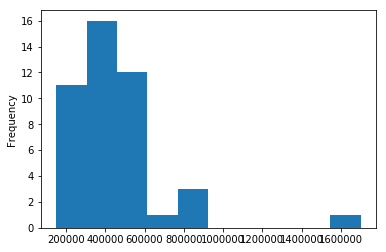

In [193]:
#Conduct additional inspoection for each location and type of house
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==1)].plot("hist")

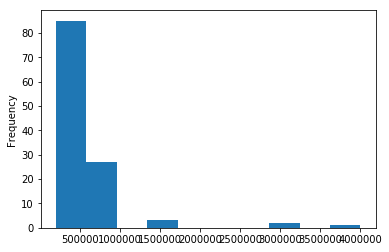

In [194]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==1)].plot("hist")

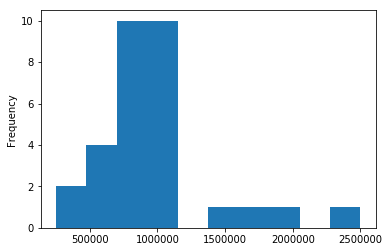

In [195]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==2)].plot("hist")

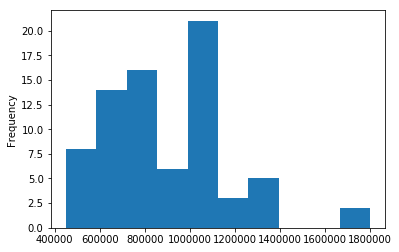

In [196]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==2)].plot("hist")

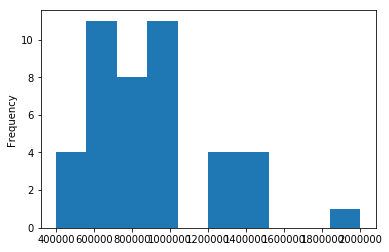

In [197]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==2)].plot("hist")

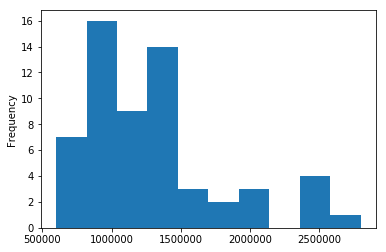

In [198]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="surulere")&(train2['bedrooms']==3)].plot("hist")

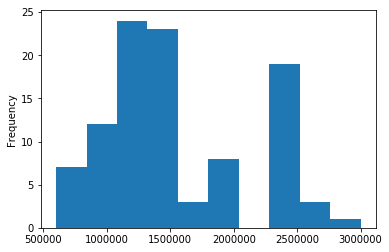

In [199]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="gbagada")&(train2['bedrooms']==3)].plot("hist")

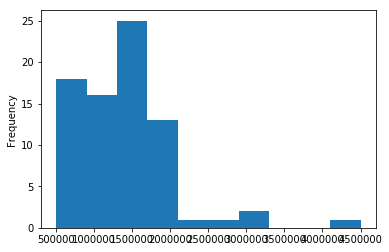

In [200]:
import matplotlib.pyplot as plt
train2['price'][(train2['location']=="yaba")&(train2['bedrooms']==3)].plot("hist")

In [201]:
#The distribution has a wide variation. It is possible type of area also determines price. We can make a feature for thsi
#create a feature that determines type of area a house is in based on price. 1 being lowest and 4 being highest type of area
train3['exec_flag']=1

for i in range(0,len(locations)):
    
    train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],35))]= 2
    train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],65))]= 3
    train3['exec_flag'][(train3['bedrooms']==3)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],80))]= 4

In [202]:
for i in range(0,len(locations)):
    train3['exec_flag'][(train3['bedrooms']==2)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],35))]= 2
    train3['exec_flag'][(train3['bedrooms']==2)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],65))]= 3
    train3['exec_flag'][(train3['bedrooms']==2)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],80))]= 4

In [203]:
for i in range(0,len(locations)):
    train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],35))]= 2
    train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],65))]= 3
    train3['exec_flag'][(train3['bedrooms']==1)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],80))]= 4

In [204]:
for i in range(0,len(locations)):
    train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],35))]= 2
    train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],65))]= 3
    train3['exec_flag'][(train3['bedrooms']==4)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],80))]= 4

In [205]:
for i in range(0,len(locations)):
    train3['exec_flag'][(train3['bedrooms']==5)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],35))]= 2
    train3['exec_flag'][(train3['bedrooms']==5)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],65))]= 3
    train3['exec_flag'][(train3['bedrooms']==5)&(train3['location']==locations[i]) & (train3['price']>= np.percentile(train3['price'],80))]= 4

In [206]:
#72%
X = train3[['bedrooms','bathrooms', 'toilets', 'estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y = train3['price']

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.2,random_state = 2)

In [208]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import r2_score
from math import sqrt

In [209]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=1, max_depth=11,n_estimators= 1400)
model1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [210]:
pred_cv = model1.predict(x_cv)
score = sqrt(mean_squared_error(y_cv,pred_cv))
print('mean_squared_error',score)

mean_squared_error 304213.38929106924


In [211]:
#adjust outliers > than 2.5m
train3['price'][train3['price']>2500000] = 2600000

In [212]:
#Adjust 1 bed room outliers
train3['price'][(train3['bedrooms']==1) & (train3['price']>750000)]= 750000

In [213]:
#Adjust 4 bed room outliers
train3['price'][(train3['bedrooms']==4) & (train3['price']<2000000)]= 2000000

In [214]:
#Adjust various outliers especially low prices across various areas and types of houses
for location in ['gbagada','surulere','yaba','lekki','ikeja','iyanaipaja','ogba','ajah','ikorodu']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==1)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] < train3['estate_price']- 50000)] = train3['estate_price']- 50000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==3)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #this guy
    train3['price'][(train3['location']==location)&(train3['bedrooms']==4)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    train3['price'][(train3['location']==location)&(train3['bedrooms']==5)&(train3['price'] < train3['estate_price']- 200000)] = train3['estate_price']- 200000
    #train3['price'][(train3['bedrooms']==1)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][(train3['bedrooms']==3)&(train3['price'] > train3['serviced_price'])] = 1
    #train3['price'][train3['price'] > 1800000] = 1

In [215]:
#Adjust two bedroom high prices
for location in ["gbagada","surulere","yaba",'lekki','ikeja','iyanaipaja','ogba','ajah','ikorodu']:
    train3['price'][(train3['location']==location)&(train3['bedrooms']==2)&(train3['price'] > train3['serviced_price']+ 100000)] = train3['estate_price']+ 100000

In [216]:
train3.head()

,bedrooms,bathrooms,toilets,description,location,spec_location,price,estate_flag,terrace_flag,new_flag,serviced_flag,security_flag,locationbed,estate_price,serviced_price,terrace_price,location_rank,new_price,exec_flag
0,4,4,5,4 Bedroom terrace duplex for Lease. 3 years re...,ikeja,off isaac john street ikeja gra ikeja lagos,3300000,1,1,1,1,1,ikeja4,3500000.0,5000000.0,3500000.0,39,5000000.0,4
1,3,3,4,This property is located within the heart of o...,ikeja,bamishele estate off allen opebi ikeja lagos,2600000,1,1,1,1,1,ikeja3,2400000.0,3500000.0,3350000.0,29,3500000.0,4
2,3,3,4,3 bedroom Shared Apartment Flat / Apartment fo...,ikeja,off allen avenue allen avenue ikeja lagos,2600000,1,1,1,1,1,ikeja3,2400000.0,3500000.0,3350000.0,29,3500000.0,4
3,5,6,6,A newly renovated 5bedroomfully detached duple...,ikeja,"off ogunlani estate, allen, ikeja. allen avenu...",3800000,1,1,1,0,1,ikeja5,4000000.0,4400000.0,3750000.0,42,4400000.0,3
4,1,1,1,clean pop all round tiles big compound ... Old...,ikeja,ikeja gra ikeja lagos,750000,1,0,0,0,1,ikeja1,575000.0,1000000.0,NaN,10,1000000.0,2


In [217]:
#modelling
X = train3[['bedrooms','bathrooms', 'toilets','estate_flag','location_rank', 'terrace_flag', 'new_flag','exec_flag' ,'serviced_flag']]
y = train3['price']

In [218]:
#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2364, 9), (2364,), (591, 9), (591,))

In [219]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=1, max_depth=11,n_estimators= 1400)
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [220]:
pred_cv = model1.predict(X_test)
score = sqrt(mean_squared_error(y_test,pred_cv))
print('mean_squared_error',score)

mean_squared_error 67380.7723843586


In [221]:
#Saving the model

import pickle

filename = "67k_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model1, file)

In [162]:
from sklearn.externals import joblib
joblib.dump(model1, '85k_model.pkl')
model = joblib.load('85k_model.pkl')

In [163]:
train3.to_csv("clean_data.csv",index = False)

In [164]:
train3.toilets.nunique()

9